## Projet LOL

### I- Chargement du jeu de données nettoyé

In [603]:
# Import des librairies

import pandas as pd
import pandas as pd
pd.options.display.max_columns = None
import itertools

import numpy as np
import random
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [604]:
# Import de la base de données

df = pd.read_csv('C:/Users/gmoba/Documents/Projet LOL/database/matches_with_timeline_complete_clean.csv')

In [605]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   region                          3501 non-null   object 
 1   source_elo                      3501 non-null   object 
 2   game_duration                   3501 non-null   float64
 3   game_version                    3501 non-null   object 
 4   team_100_win                    3501 non-null   int64  
 5   team_100_top_champion_name      3501 non-null   object 
 6   team_100_jungle_champion_name   3501 non-null   object 
 7   team_100_mid_champion_name      3501 non-null   object 
 8   team_100_adc_champion_name      3501 non-null   object 
 9   team_100_support_champion_name  3501 non-null   object 
 10  team_100_ban_1_champion_id      3501 non-null   int64  
 11  team_100_ban_2_champion_id      3501 non-null   int64  
 12  team_100_ban_3_champion_id      35

In [606]:
# Colonnes à convertir en object
cols_to_object = [
    "team_100_win",
    "team_100_first_tower",
    "team_200_first_tower",
]

# Ban champion IDs
cols_to_object += [f"team_100_ban_{i}_champion_id" for i in range(1,6)]
cols_to_object += [f"team_200_ban_{i}_champion_id" for i in range(1,6)]

# Conversion en object
for col in cols_to_object:
    df[col] = df[col].astype("object")

In [607]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   region                          3501 non-null   object 
 1   source_elo                      3501 non-null   object 
 2   game_duration                   3501 non-null   float64
 3   game_version                    3501 non-null   object 
 4   team_100_win                    3501 non-null   object 
 5   team_100_top_champion_name      3501 non-null   object 
 6   team_100_jungle_champion_name   3501 non-null   object 
 7   team_100_mid_champion_name      3501 non-null   object 
 8   team_100_adc_champion_name      3501 non-null   object 
 9   team_100_support_champion_name  3501 non-null   object 
 10  team_100_ban_1_champion_id      3501 non-null   object 
 11  team_100_ban_2_champion_id      3501 non-null   object 
 12  team_100_ban_3_champion_id      35

### II- Exploration et nettoyage du jeu de données

In [609]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

df.head()

,region,source_elo,game_duration,game_version,team_100_win,team_100_top_champion_name,team_100_jungle_champion_name,team_100_mid_champion_name,team_100_adc_champion_name,team_100_support_champion_name,team_100_ban_1_champion_id,team_100_ban_2_champion_id,team_100_ban_3_champion_id,team_100_ban_4_champion_id,team_100_ban_5_champion_id,team_100_top_summoner_1_name,team_100_top_summoner_2_name,team_200_ban_1_champion_id,team_200_ban_2_champion_id,team_200_ban_3_champion_id,team_200_ban_4_champion_id,team_200_ban_5_champion_id,team_200_top_champion_name,team_200_jungle_champion_name,team_200_mid_champion_name,team_200_adc_champion_name,team_200_support_champion_name,team_200_top_summoner_1_name,team_200_top_summoner_2_name,team_100_first_tower,team_100_tower_kills,team_200_first_tower,team_200_tower_kills
0,euw1,HIGH_ELO,29.400000,15.22.724.5161,1,Sett,Volibear,Fizz,Sivir,Milio,51,7,498,54,234,Ignite,Flash,7,80,54,246,89,Darius,LeeSin,Orianna,Jinx,Pyke,Ghost,Flash,1,11,0,2
1,euw1,HIGH_ELO,28.466667,15.22.724.5161,0,Jayce,JarvanIV,Syndra,Kaisa,Blitzcrank,517,800,142,111,157,Flash,Teleport,238,246,54,117,119,Sett,Khazix,Viktor,Yunara,Lux,Teleport,Flash,0,4,1,11
2,euw1,HIGH_ELO,27.816667,15.22.724.5161,1,Darius,Khazix,Lissandra,Ziggs,Zilean,236,902,55,54,517,Ghost,Flash,711,67,24,119,11,Volibear,Diana,Yasuo,Smolder,Bard,Flash,Ignite,1,8,0,2
3,euw1,HIGH_ELO,26.600000,15.22.724.5161,1,Darius,Briar,Sylas,Veigar,Poppy,234,43,51,107,67,Ghost,Flash,111,-1,238,101,54,Gragas,Hecarim,Mel,Twitch,Lulu,Teleport,Flash,1,11,0,1
4,euw1,HIGH_ELO,32.033333,15.22.724.5161,0,Mordekaiser,Viego,Swain,Ashe,Lulu,555,131,24,8,2,Ignite,Flash,25,8,107,238,54,Volibear,MonkeyKing,Syndra,Samira,Nautilus,Ignite,Flash,0,5,1,12


In [610]:
df.describe()

,game_duration,team_100_tower_kills,team_200_tower_kills
count,3501.000000,3501.000000,3501.000000
mean,27.312768,5.767209,5.448443
std,6.575302,3.686705,3.694240
min,1.683333,0.000000,0.000000
25%,23.850000,3.000000,2.000000
50%,27.766667,6.000000,5.000000
75%,30.950000,9.000000,9.000000
max,56.583333,15.000000,16.000000


In [611]:
qualitatives = df.select_dtypes(include=["object", "category", "bool"])
quantitatives = df.select_dtypes(include=["int64", "float64"])

print("Variables qualitatives :", qualitatives.shape[1])
print("Variables quantitatives :", quantitatives.shape[1])

Variables qualitatives : 30
Variables quantitatives : 3


In [612]:
df.describe(include=["object", "category", "bool"])

,region,source_elo,game_version,team_100_win,team_100_top_champion_name,team_100_jungle_champion_name,team_100_mid_champion_name,team_100_adc_champion_name,team_100_support_champion_name,team_100_ban_1_champion_id,team_100_ban_2_champion_id,team_100_ban_3_champion_id,team_100_ban_4_champion_id,team_100_ban_5_champion_id,team_100_top_summoner_1_name,team_100_top_summoner_2_name,team_200_ban_1_champion_id,team_200_ban_2_champion_id,team_200_ban_3_champion_id,team_200_ban_4_champion_id,team_200_ban_5_champion_id,team_200_top_champion_name,team_200_jungle_champion_name,team_200_mid_champion_name,team_200_adc_champion_name,team_200_support_champion_name,team_200_top_summoner_1_name,team_200_top_summoner_2_name,team_100_first_tower,team_200_first_tower
count,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501
unique,1,1,46,2,131,80,124,71,90,164,163,163,160,161,7,8,164,160,160,165,164,126,79,121,74,84,7,8,2,2
top,euw1,HIGH_ELO,15.18.710.2811,1,Ambessa,Viego,Syndra,Kaisa,Nami,119,555,555,555,119,Flash,Teleport,119,119,555,119,555,Ambessa,Viego,Syndra,Kaisa,Nami,Flash,Teleport,1,0
freq,3501,3501,985,1816,180,220,179,320,256,246,207,203,175,162,1958,1500,235,219,199,193,148,138,242,151,320,300,1996,1473,1823,1872


In [613]:
cat_unique_summary = pd.DataFrame({
    "dtype": qualitatives.dtypes,
    "unique_values": qualitatives.nunique()
})

print(cat_unique_summary)

                                 dtype  unique_values
region                          object              1
source_elo                      object              1
game_version                    object             46
team_100_win                    object              2
team_100_top_champion_name      object            131
team_100_jungle_champion_name   object             80
team_100_mid_champion_name      object            124
team_100_adc_champion_name      object             71
team_100_support_champion_name  object             90
team_100_ban_1_champion_id      object            164
team_100_ban_2_champion_id      object            163
team_100_ban_3_champion_id      object            163
team_100_ban_4_champion_id      object            160
team_100_ban_5_champion_id      object            161
team_100_top_summoner_1_name    object              7
team_100_top_summoner_2_name    object              8
team_200_ban_1_champion_id      object            164
team_200_ban_2_champion_id  

### III- Data visualisation

#### Analyse univarié

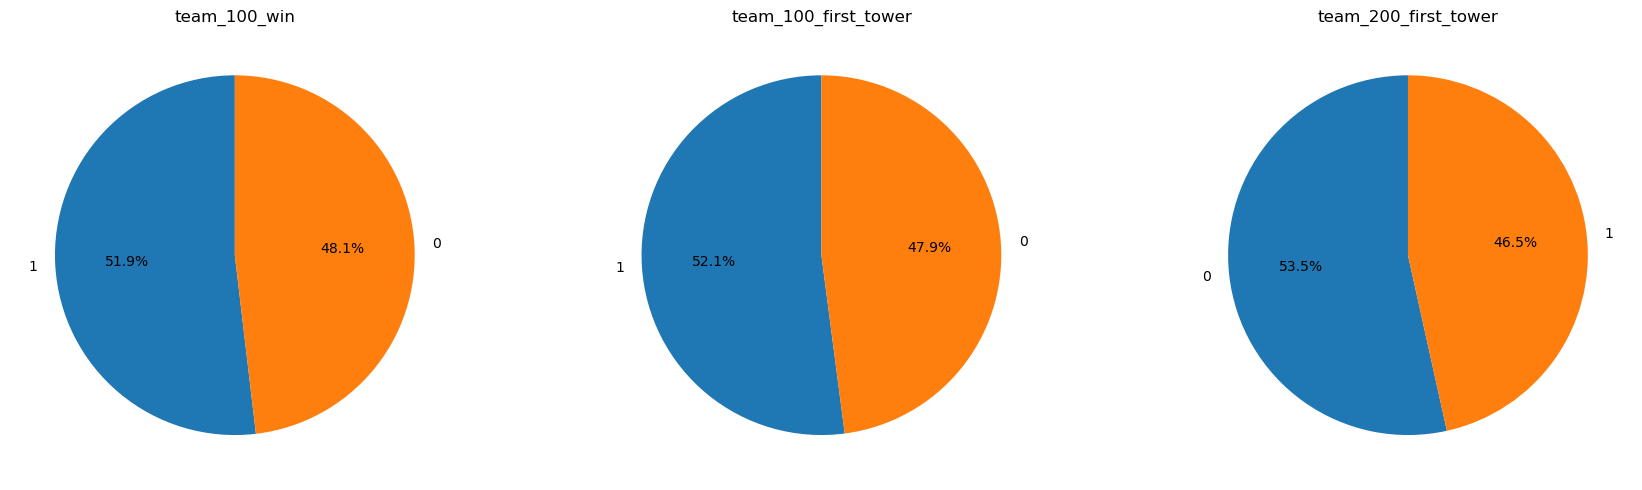

In [616]:
# Sélection des variables qualitatives
cat_vars = ["team_100_win","team_100_first_tower","team_200_first_tower"]

n = len(cat_vars)
cols = 3
rows = (n + cols - 1) // cols  # arrondi vers le haut

fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*5))
axes = axes.flatten()

for i, col in enumerate(cat_vars):
    counts = df[col].value_counts()  # nombre pour chaque modalité
    
    axes[i].pie(
        counts,
        labels=counts.index,
        autopct=lambda p: f'{p:.1f}%',  # affiche le pourcentage avec 1 décimale
        startangle=90,
        textprops={'fontsize': 10}
    )
    axes[i].set_title(col, fontsize=12)

# Masquer les axes restants s'il y en a
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


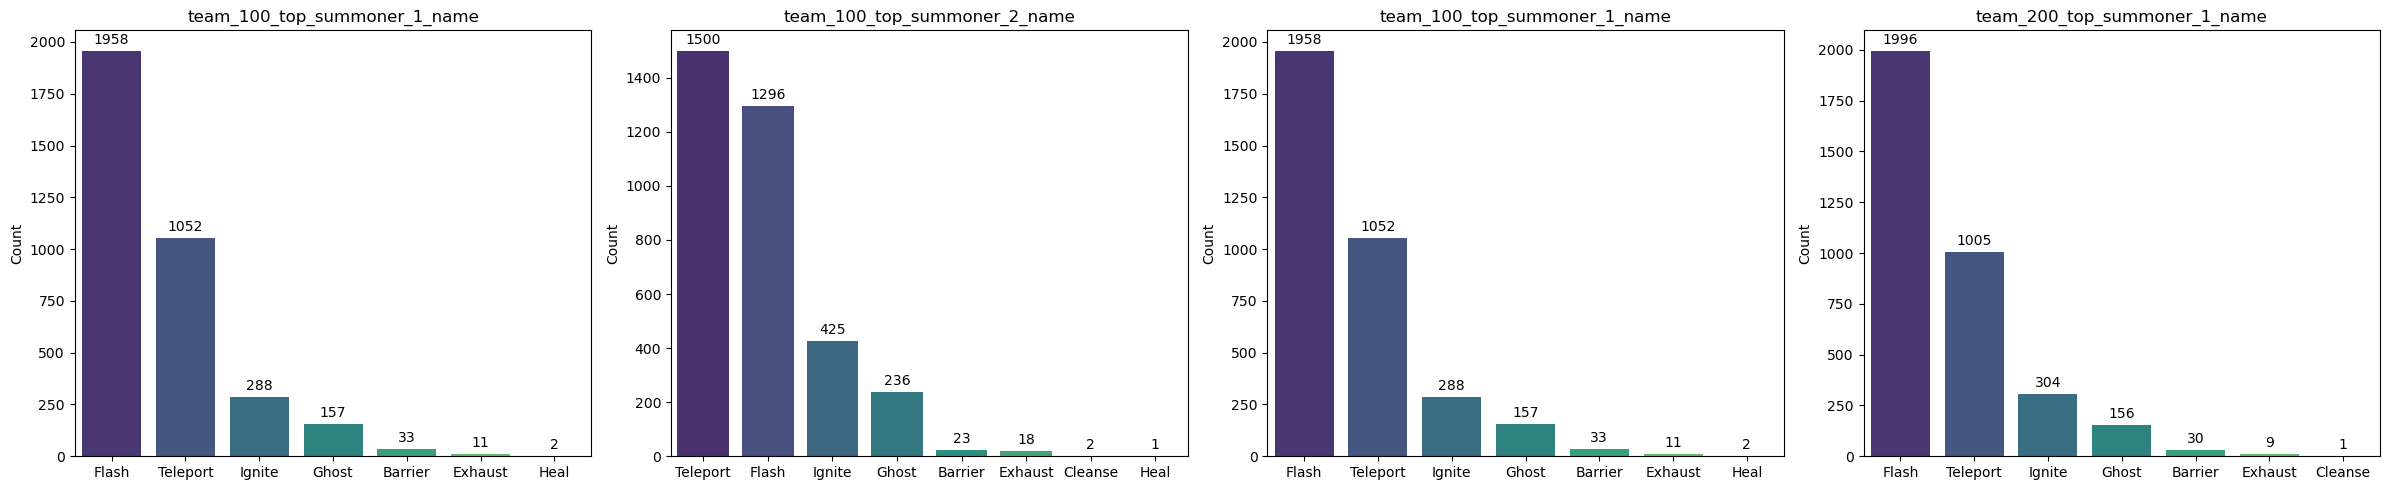

In [617]:
# Sélection des variables qualitatives
cat_vars = ["team_100_top_summoner_1_name","team_100_top_summoner_2_name","team_100_top_summoner_1_name","team_200_top_summoner_1_name"]
n = len(cat_vars)
cols = 4
rows = (n + cols - 1) // cols  # arrondi vers le haut

fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*5))
axes = axes.flatten()

for i, col in enumerate(cat_vars):
    counts = df[col].value_counts()
    total = counts.sum()
    
    # Créer une palette adaptée au nombre de modalités
    palette = sns.color_palette("viridis", n_colors=len(counts))
    
    # Barplot avec hue pour compatibilité Seaborn v0.14+
    sns.barplot(
        x=counts.index,
        y=counts.values,
        hue=counts.index,
        palette=palette,
        dodge=False,
        legend=False,
        ax=axes[i]
    )
    
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    
    # Ajouter nombre et pourcentage au-dessus de chaque barre
    for j, value in enumerate(counts.values):
        axes[i].text(
            j, 
            value + max(counts.values)*0.01, 
            f"{value}", 
            ha='center', 
            va='bottom', 
            fontsize=10
        )

# Masquer les axes restants s'il y en a
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


##### Top 10 des modalités les plus représentés pour les variables qualitatives

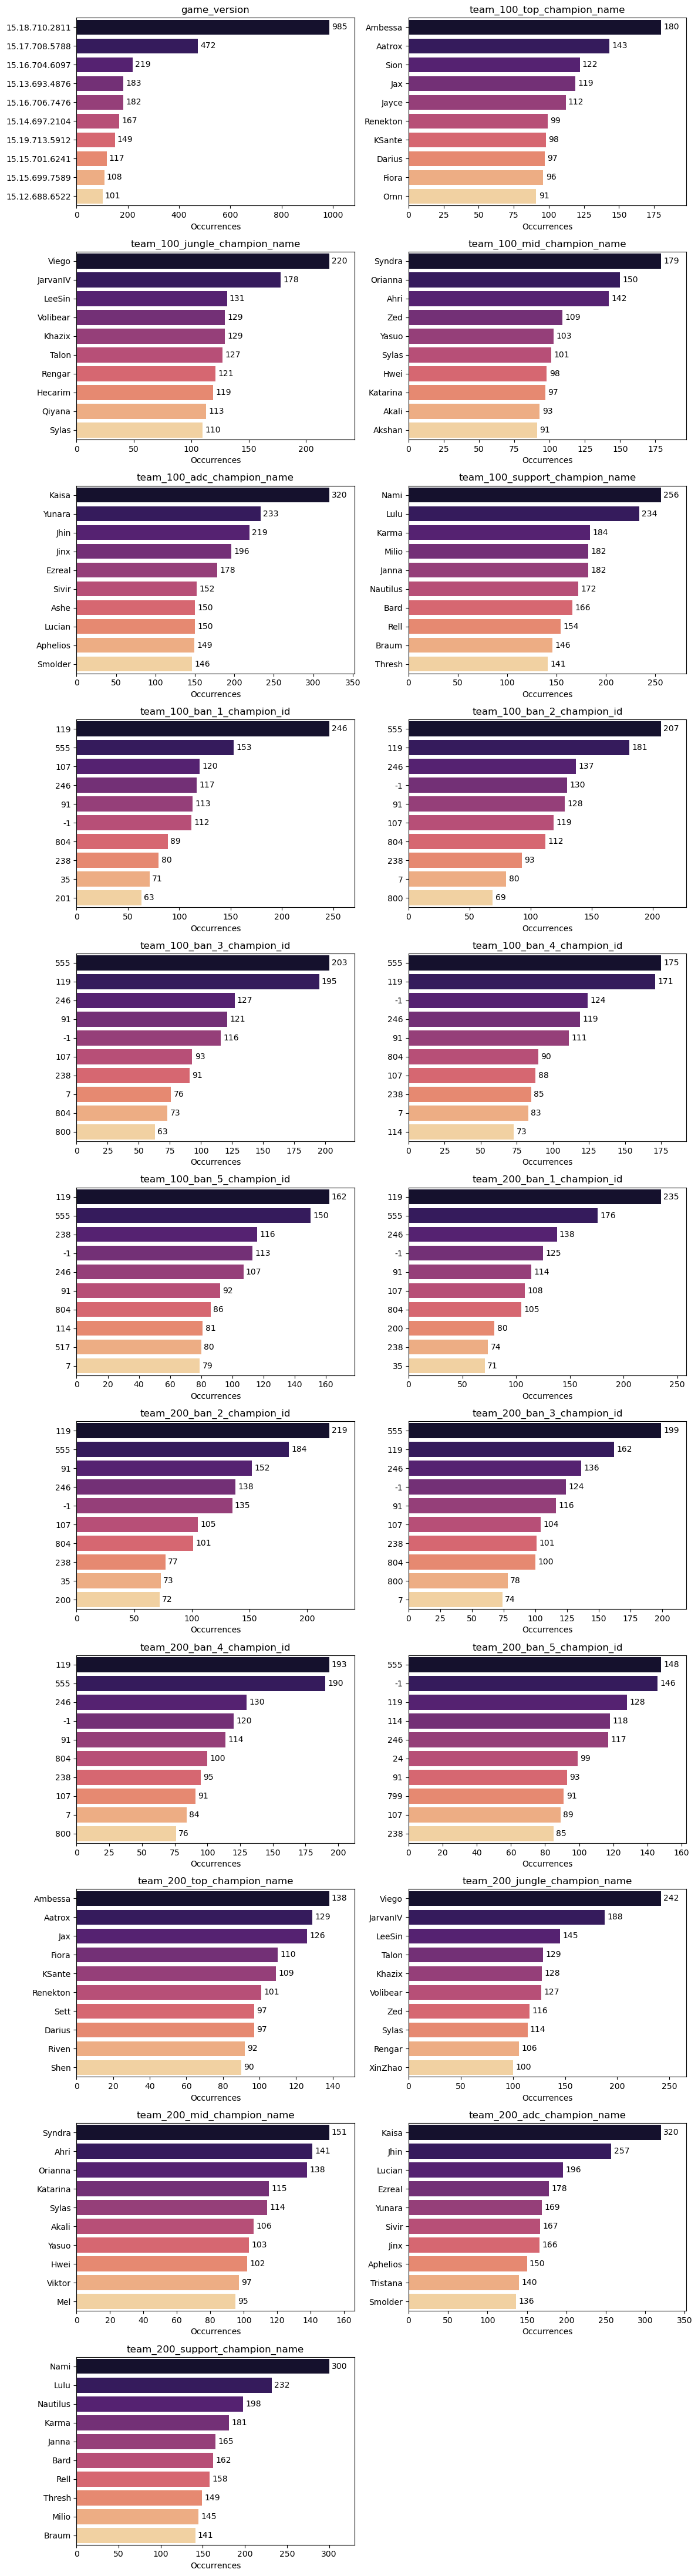

In [619]:
# Variables qualitatives
categorielles = df.select_dtypes(include=['object']).columns.tolist()

# Colonnes avec plus de 10 modalités
cols_plus_10_modalities = [col for col in categorielles if df[col].nunique() > 10]

# Figure : 2 graphes par ligne
cols_per_row = 2
n_rows = math.ceil(len(cols_plus_10_modalities) / cols_per_row)
fig, axes = plt.subplots(n_rows, cols_per_row, figsize=(6*cols_per_row, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(cols_plus_10_modalities):
    top10 = df[col].value_counts().head(10)

    tmp = pd.DataFrame({
        "label": top10.index.astype(str),
        "count": top10.values
    })

    tmp["label"] = pd.Categorical(tmp["label"], categories=tmp["label"], ordered=True)

    sns.barplot(
        data=tmp,
        x="count",
        y="label",
        hue="label",                         # ← Ajout exigé par Seaborn 0.14+
        palette=sns.color_palette("magma", len(tmp)),
        dodge=False,
        legend=False,
        ax=axes[i]
    )

    axes[i].set_xlim(0, tmp["count"].max() * 1.10)
    axes[i].set_title(col)
    axes[i].set_xlabel("Occurrences")
    axes[i].set_ylabel("")
    axes[i].tick_params(axis='y', rotation=0)

    # Afficher les valeurs
    for j, v in enumerate(tmp["count"]):
        axes[i].text(v + max(tmp["count"])*0.01, j, str(v), va="center")

# Supprimer les axes vides
for j in range(len(cols_plus_10_modalities), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### Variables quantitatives

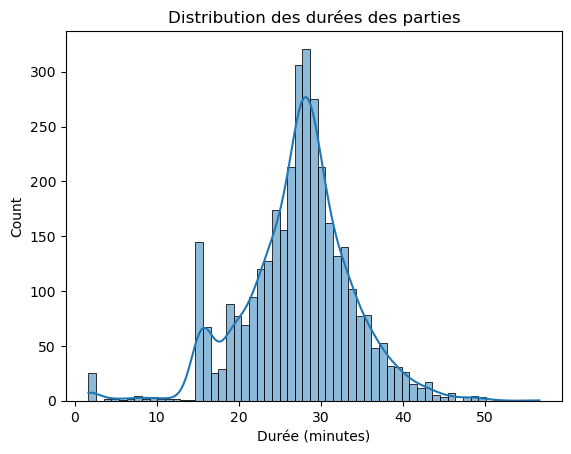

In [621]:
# Histogramme
sns.histplot(df['game_duration'], kde=True)
plt.xlabel("Durée (minutes)")
plt.title("Distribution des durées des parties")
plt.show()


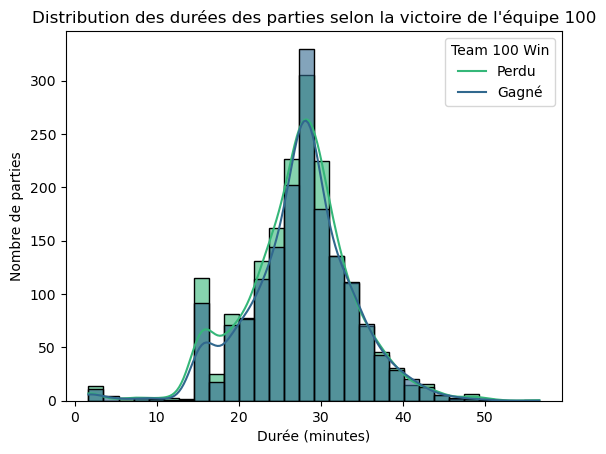

In [622]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramme par victoire de team 100
sns.histplot(
    data=df,
    x='game_duration',
    hue='team_100_win',   # colorer selon qui gagne
    kde=True,
    palette="viridis",
    alpha=0.6,
    bins=30
)

plt.xlabel("Durée (minutes)")
plt.ylabel("Nombre de parties")
plt.title("Distribution des durées des parties selon la victoire de l'équipe 100")
plt.legend(title="Team 100 Win", labels=["Perdu", "Gagné"])
plt.show()


In [685]:
# Calculer count, total et moyenne
summary_table = df.groupby('team_100_win')['game_duration'].agg(
    count='size',
    total_minutes='sum',
    avg_minutes='mean'
).reset_index()

# Renommer les valeurs de team_100_win pour lisibilité
summary_table['team_100_win'] = summary_table['team_100_win'].map({0:'Défaite', 1:'Victoire'})

# Affichage
print(summary_table)


  team_100_win  count  total_minutes  avg_minutes
0      Défaite   1685        46229.6    27.435964
1     Victoire   1816        49392.4    27.198458


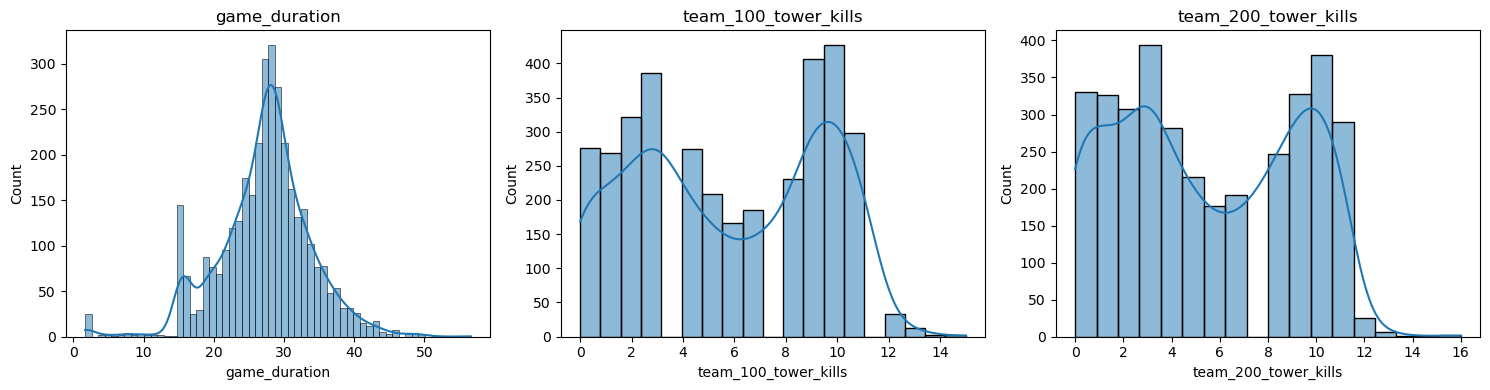

In [623]:
quant_vars = df.select_dtypes(include=np.number).columns.tolist()
n = len(quant_vars)

cols = 3
rows = (n + cols - 1) // cols  # arrondi vers le haut

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))  
axes = axes.flatten()

for i, var in enumerate(quant_vars):
    sns.histplot(df[var], kde=True, ax=axes[i])
    axes[i].set_title(var)

# Masquer axes vides
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

#### Analyse bivarié

##### Variables qualitatives

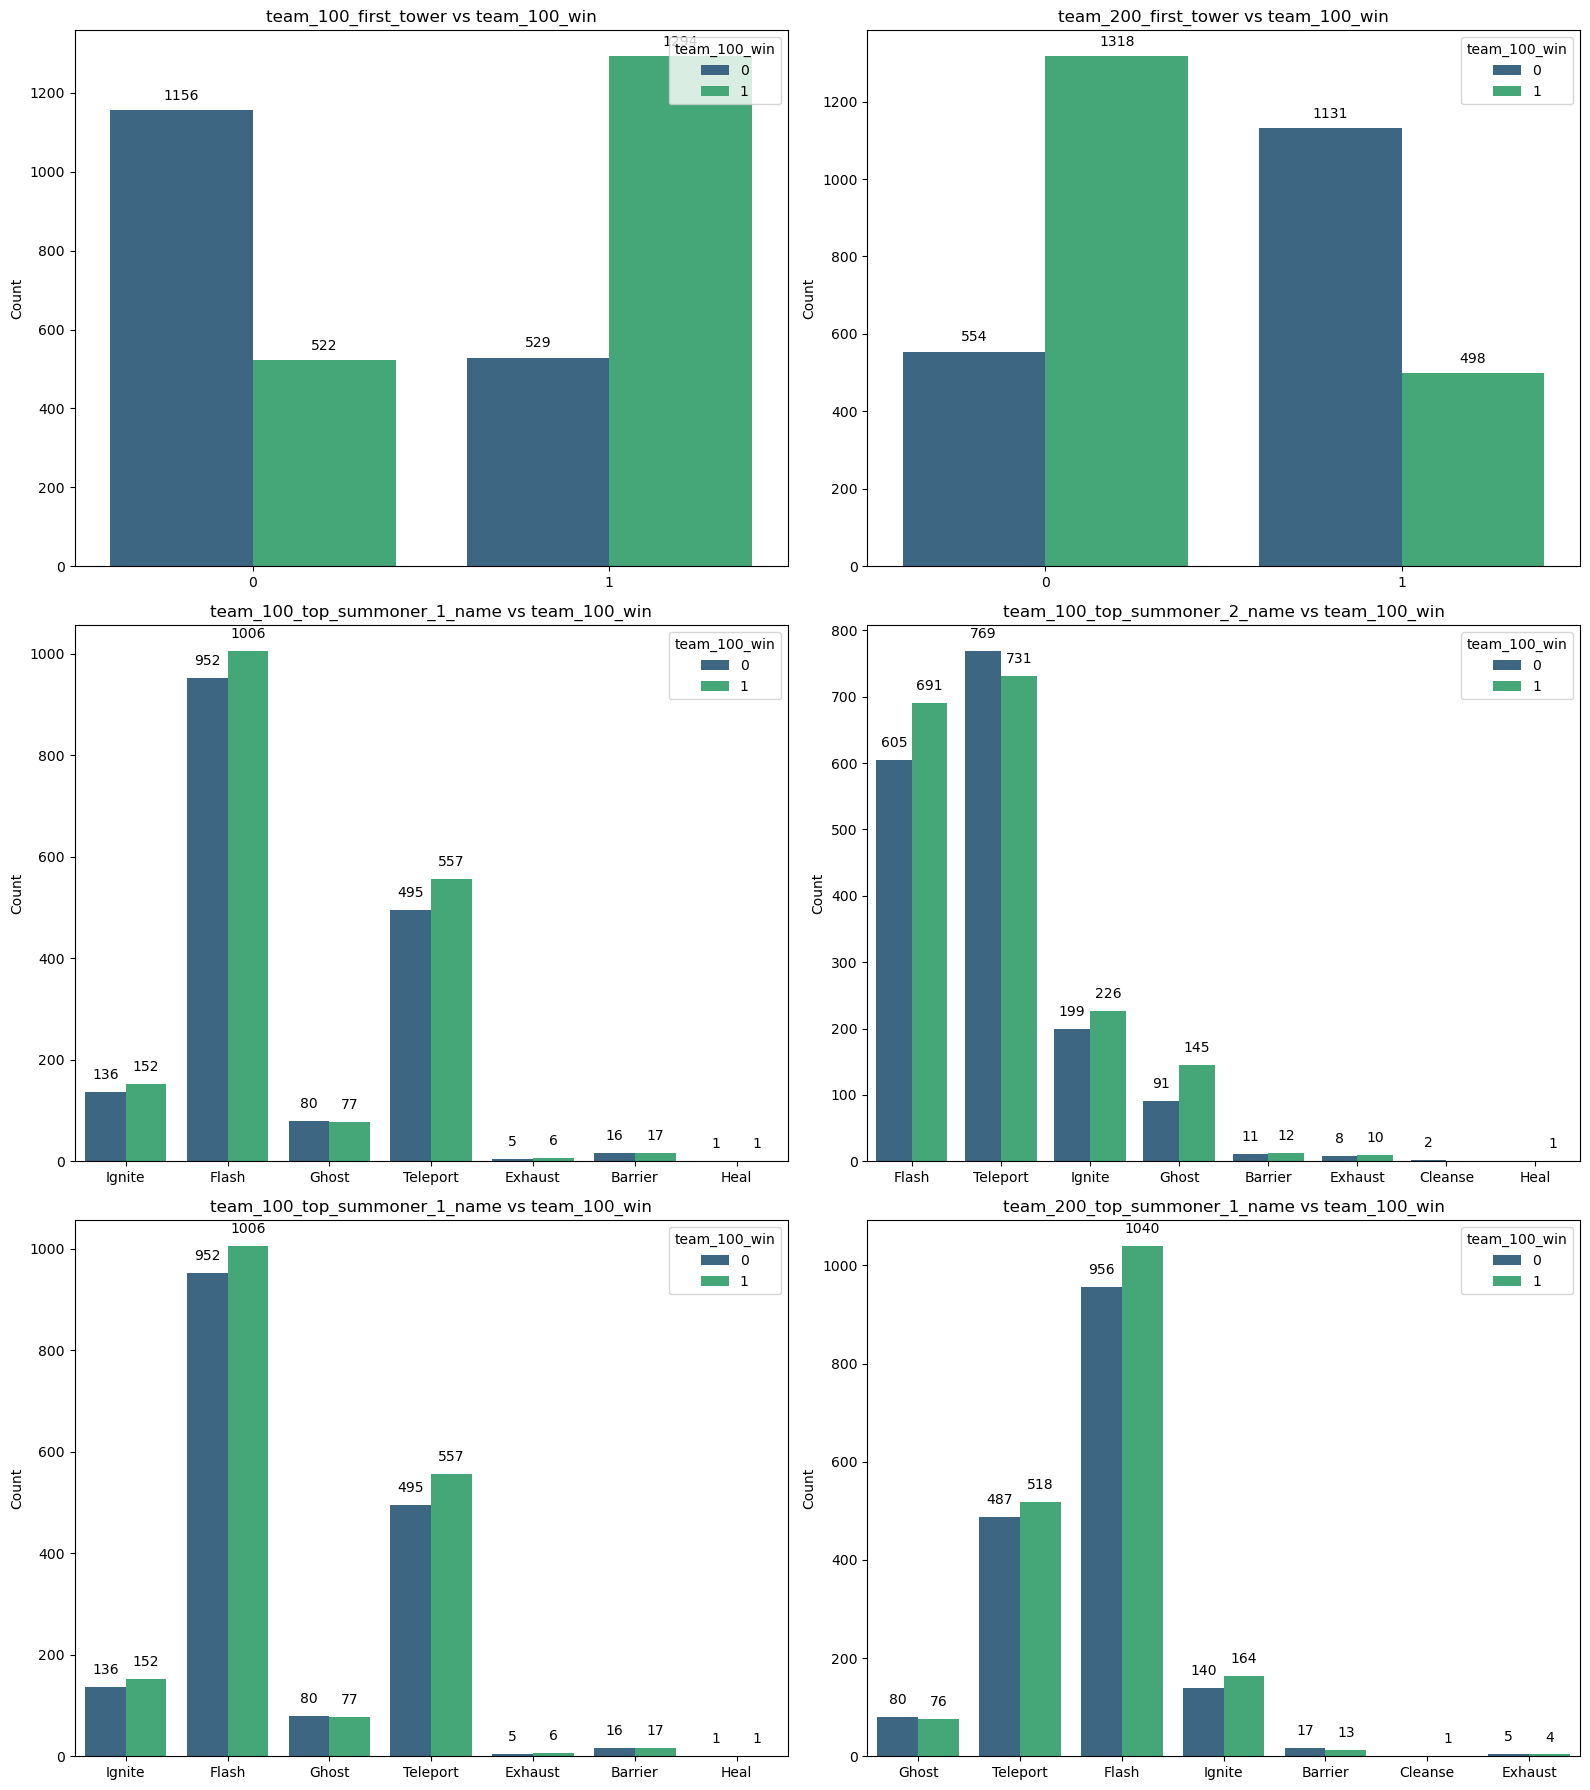

In [626]:
# Target qualitative
target = "team_100_win"

# Sélection des variables qualitatives (sauf la target)
cat_vars = ["team_100_win","team_100_first_tower","team_200_first_tower"] + ["team_100_top_summoner_1_name","team_100_top_summoner_2_name","team_100_top_summoner_1_name","team_200_top_summoner_1_name"]
cat_vars = [col for col in cat_vars if col != target]

n = len(cat_vars)
cols = 2  # 2 graphiques par ligne pour plus de lisibilité
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols*8, rows*6))
axes = axes.flatten()

for i, col in enumerate(cat_vars):
    # Countplot avec hue = target
    sns.countplot(
        data=df,
        x=col,
        hue=target,
        palette="viridis",
        ax=axes[i]
    )
    
    axes[i].set_title(f"{col} vs {target}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    
    # Ajouter le count au-dessus de chaque barre
    for p in axes[i].patches:
        height = p.get_height()
        if height > 0:  # ne pas afficher pour les barres vides
            axes[i].text(
                p.get_x() + p.get_width()/2,
                height + max(df[col].value_counts())*0.01,
                f"{int(height)}",
                ha='center',
                va='bottom',
                fontsize=10
            )
    
    axes[i].legend(title=target, loc='upper right')

# Masquer les axes vides
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()



In [627]:
vars_to_check = [col for col in df.columns if "ban" in col]

# Créer une table avec les colonnes sélectionnées
df_subset = df[vars_to_check]

# Compter les combinaisons uniques
comb_counts = df_subset.value_counts().reset_index(name='count')

# Afficher les 10 combinaisons les plus fréquentes
comb_counts.head(5)

,team_100_ban_1_champion_id,team_100_ban_2_champion_id,team_100_ban_3_champion_id,team_100_ban_4_champion_id,team_100_ban_5_champion_id,team_200_ban_1_champion_id,team_200_ban_2_champion_id,team_200_ban_3_champion_id,team_200_ban_4_champion_id,team_200_ban_5_champion_id,count
0,-1,-1,51,8,35,42,134,238,200,98,1
1,201,114,18,203,107,119,134,518,92,-1,1
2,201,51,200,526,126,114,950,111,120,163,1
3,201,54,157,29,200,18,517,59,30,234,1
4,201,56,555,875,517,18,119,234,-1,238,1


In [628]:
vars_to_check = [col for col in df.columns if "champion_name" in col]

# Créer une table avec les colonnes sélectionnées
df_subset = df[vars_to_check]

# Compter les combinaisons uniques
comb_counts = df_subset.value_counts().reset_index(name='count')

# Afficher les 10 combinaisons les plus fréquentes
comb_counts.head(5)

,team_100_top_champion_name,team_100_jungle_champion_name,team_100_mid_champion_name,team_100_adc_champion_name,team_100_support_champion_name,team_200_top_champion_name,team_200_jungle_champion_name,team_200_mid_champion_name,team_200_adc_champion_name,team_200_support_champion_name,count
0,Aatrox,Belveth,KogMaw,Jinx,Milio,Quinn,Khazix,Syndra,Twitch,Janna,1
1,Renekton,Khazix,Azir,Caitlyn,Lux,DrMundo,Kindred,Talon,Sivir,Janna,1
2,Renekton,Graves,Rumble,Ashe,Karma,Olaf,Talon,Ryze,Sivir,Rakan,1
3,Renekton,Hecarim,Syndra,Brand,Nami,Sett,Nunu,Anivia,Lucian,Blitzcrank,1
4,Renekton,JarvanIV,Anivia,Aphelios,Janna,Olaf,Volibear,Akshan,Twitch,Leona,1


In [629]:
vars_to_check = [col for col in df.columns if "team_100_ban" in col]

# Créer une table avec les colonnes sélectionnées
df_subset = df[vars_to_check]

# Compter les combinaisons uniques
comb_counts = df_subset.value_counts().reset_index(name='count')

# Afficher les 10 combinaisons les plus fréquentes
comb_counts.head(5)

,team_100_ban_1_champion_id,team_100_ban_2_champion_id,team_100_ban_3_champion_id,team_100_ban_4_champion_id,team_100_ban_5_champion_id,count
0,-1,-1,51,8,35,1
1,201,114,18,203,107,1
2,201,51,200,526,126,1
3,201,54,157,29,200,1
4,201,56,555,875,517,1


In [630]:
vars_to_check = [col for col in df.columns if "champion_name" in col]
vars_to_check = [col for col in vars_to_check if "100" in col]
# Créer une table avec les colonnes sélectionnées
df_subset = df[vars_to_check]

# Compter les combinaisons uniques
comb_counts = df_subset.value_counts().reset_index(name='count')

# Afficher les 10 combinaisons les plus fréquentes
comb_counts.head(5)

,team_100_top_champion_name,team_100_jungle_champion_name,team_100_mid_champion_name,team_100_adc_champion_name,team_100_support_champion_name,count
0,Aatrox,Belveth,KogMaw,Jinx,Milio,1
1,Renekton,Khazix,Azir,Caitlyn,Lux,1
2,Renekton,Graves,Rumble,Ashe,Karma,1
3,Renekton,Hecarim,Syndra,Brand,Nami,1
4,Renekton,JarvanIV,Anivia,Aphelios,Janna,1


##### Focus sur le rôle de Top

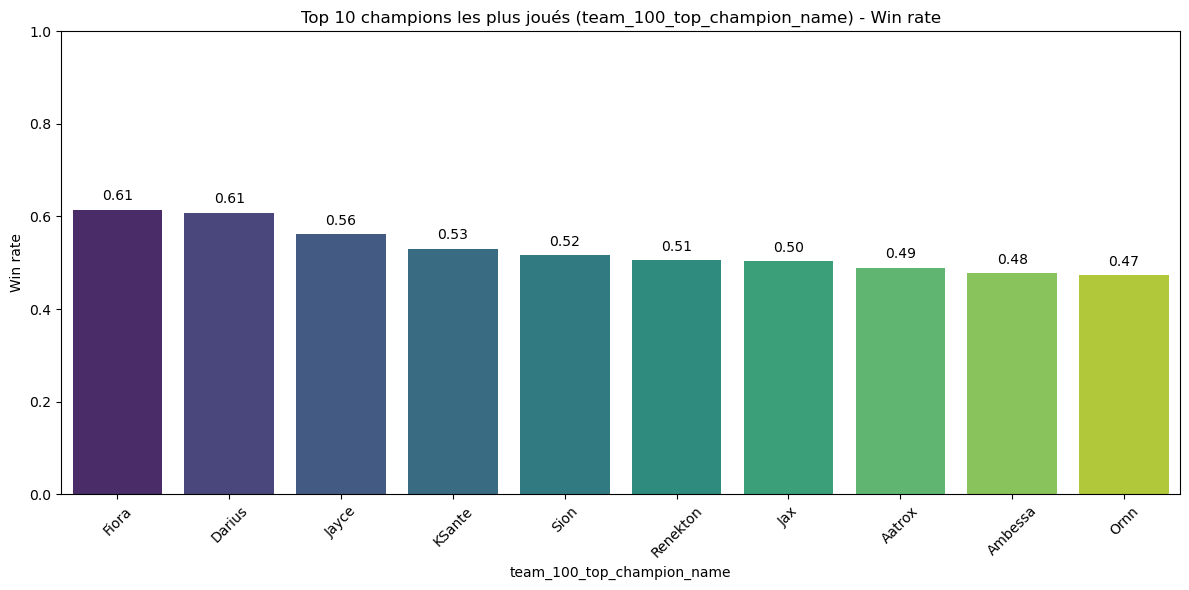

In [632]:
var1 = "team_100_top_champion_name"
target = "team_100_win"

# Calcul du win rate par champion
winrate_df = df.groupby(var1)[target].mean().reset_index(name="win_rate")

# Garder les 10 champions les plus joués
top10_champs = df[var1].value_counts().nlargest(10).index
winrate_df = winrate_df[winrate_df[var1].isin(top10_champs)]

# Trier par win rate décroissant
winrate_df = winrate_df.sort_values(by="win_rate", ascending=False)

# Barplot vertical
plt.figure(figsize=(12,6))
sns.barplot(
    x=var1,
    y="win_rate",
    data=winrate_df,
    hue=var1,           # assigner x à hue pour éviter le warning
    palette="viridis",
    dodge=False,
    legend=False         # pas de légende inutile
)

plt.title(f"Top 10 champions les plus joués ({var1}) - Win rate")
plt.ylabel("Win rate")
plt.xlabel(var1)
plt.ylim(0,1)
plt.xticks(rotation=45)

# Afficher le win rate exact au-dessus de chaque barre
for i, row in enumerate(winrate_df.itertuples()):
    plt.text(i, row.win_rate + 0.02, f"{row.win_rate:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


###### Focus sur le rôle de Top : Synergies

In [634]:
# 1. Colonnes champion_name de team 100
vars_to_check = [col for col in df.columns if "champion_name" in col and "100" in col]

# 2. Conserver uniquement les variables en combinaison avec le TOP
top_var = "team_100_top_champion_name"
other_vars = [col for col in vars_to_check if col != top_var]

results = {}

# 3. Pour chaque autre variable → combinaison (top + role)
for var in other_vars:
    
    # Calcul du count et du winrate
    temp = (
        df.groupby([top_var, var])[target]
        .agg(
            winrate="mean",
            count="size"
        )
        .reset_index()
        .sort_values("count", ascending=False)   # tri par count décroissant
    )
    
    results[(top_var, var)] = temp

# 4. Affichage lisible
for (top_var, var), table in results.items():
    print(f"\n=== SYNERGIES POUR : {top_var} + {var} ===")
    print(f"Nombre total de combos uniques : {len(table)}\n")
    print(table.head(10))       # top 10 par count



=== SYNERGIES POUR : team_100_top_champion_name + team_100_jungle_champion_name ===
Nombre total de combos uniques : 1849

     team_100_top_champion_name team_100_jungle_champion_name   winrate  count
92                      Ambessa                        Khazix  0.454545     11
655                         Jax                      JarvanIV  0.272727     11
1249                      Riven                         Viego       0.6     10
1672                   Vladimir                         Viego       0.6     10
94                      Ambessa                        LeeSin       0.3     10
120                     Ambessa                      Volibear       0.6     10
768                      KSante                         Viego  0.555556      9
498                        Gnar                         Talon  0.555556      9
443                       Garen                       Hecarim  0.444444      9
87                      Ambessa                       Hecarim     0.375      8

=== SY

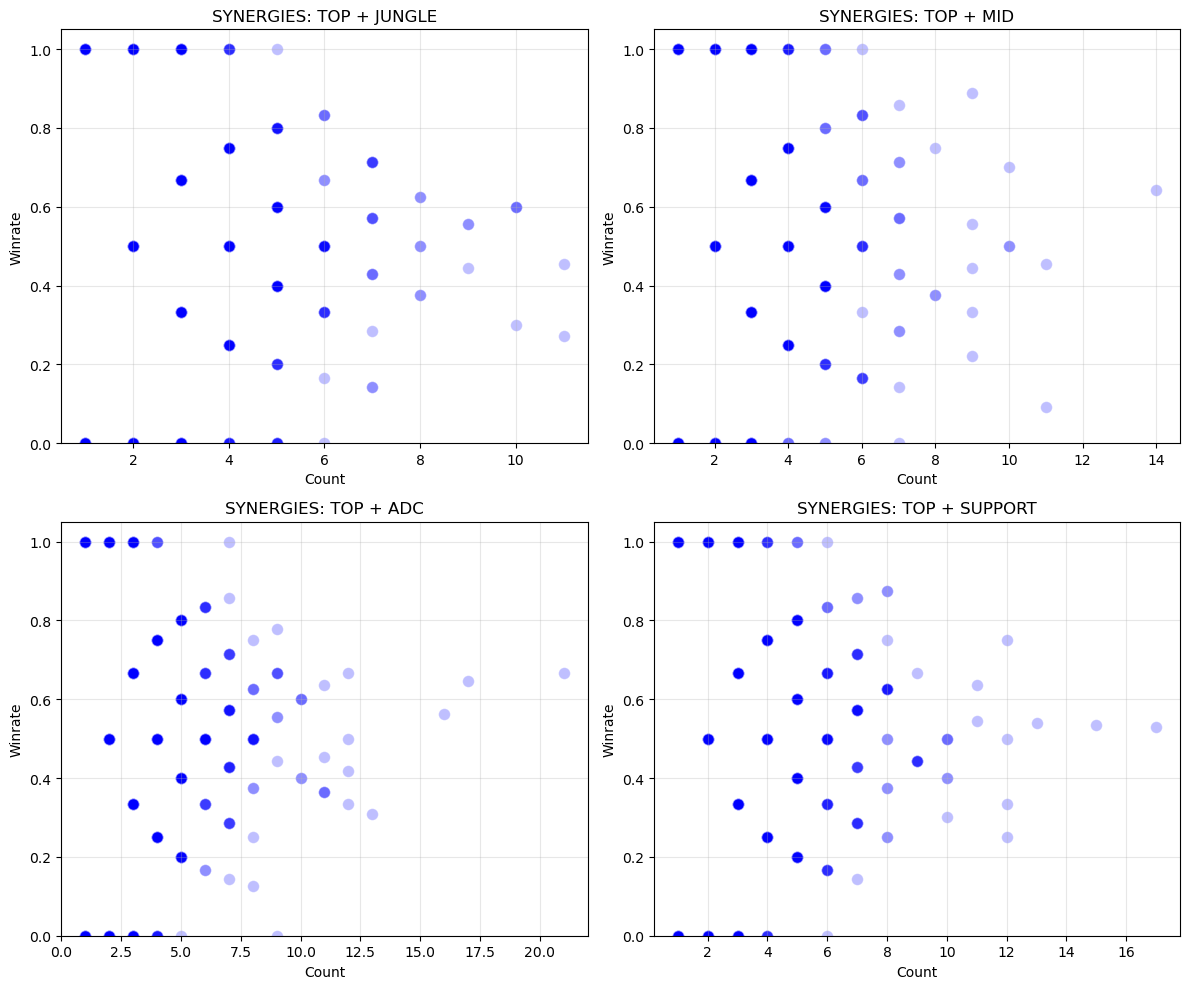

In [635]:
# 1. Colonnes champion_name de team 100
vars_to_check = [col for col in df.columns if "champion_name" in col and "100" in col]

# 2. Conserver uniquement TOP + autres rôles
top_var = "team_100_top_champion_name"
other_vars = [col for col in vars_to_check if col != top_var]

# 3. Calcul pour chaque rôle
plots = {}

for var in other_vars:
    temp = (
        df.groupby([top_var, var])[target]
        .agg(
            winrate="mean",
            count="size"
        )
        .reset_index()
    )
    plots[var] = temp

# 4. Création des graphes (un par rôle)
cols = 2
rows = (len(plots) + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(12, 10))
axes = axes.flatten()

for ax, (role, data) in zip(axes, plots.items()):
    
    sns.scatterplot(
        data=data,
        x="count",
        y="winrate",
        color="blue",
        s=70,
        alpha=0.25,
        ax=ax
    )
    
    ax.set_title(f"SYNERGIES: TOP + {role.replace('team_100_', '').replace('_champion_name','').upper()}")
    ax.set_xlabel("Count")
    ax.set_ylabel("Winrate")
    ax.set_ylim(0, 1.05)
    ax.grid(alpha=0.3)

# Masquer cases vides
for i in range(len(plots), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


###### Focus sur le rôle de Top : Contres

In [637]:
# 1. Colonnes champion_name de team 100
vars_to_check = [col for col in df.columns if "champion_name" in col and "200" in col]

# 2. Conserver uniquement les variables en combinaison avec le TOP
top_var = "team_100_top_champion_name"
other_vars = [col for col in vars_to_check if col != top_var]

results = {}

# 3. Pour chaque autre variable → combinaison (top + role)
for var in other_vars:
    
    # Calcul du count et du winrate
    temp = (
        df.groupby([top_var, var])[target]
        .agg(
            winrate="mean",
            count="size"
        )
        .reset_index()
        .sort_values("count", ascending=False)   # tri par count décroissant
    )
    
    results[(top_var, var)] = temp

# 4. Affichage lisible
for (top_var, var), table in results.items():
    print(f"\n=== CONTRE ENTRE : {top_var} + {var} ===")
    print(f"Nombre total de combos uniques : {len(table)}\n")
    print(table.head(10))       # top 10 par count



=== CONTRE ENTRE : team_100_top_champion_name + team_200_top_champion_name ===
Nombre total de combos uniques : 2045

     team_100_top_champion_name team_200_top_champion_name   winrate  count
119                     Ambessa                   Renekton       0.4     20
17                       Aatrox                     KSante       0.6     15
90                      Ambessa                    Camille      0.25     12
1577                       Sion                     Aatrox       0.6     10
721                         Jax                    Ambessa       0.6     10
410                       Fiora                      Garen  0.777778      9
104                     Ambessa                     KSante  0.333333      9
1578                       Sion                    Ambessa     0.625      8
1586                       Sion                      Fiora      0.75      8
1531                       Shen                      Riven      0.75      8

=== CONTRE ENTRE : team_100_top_champion_nam

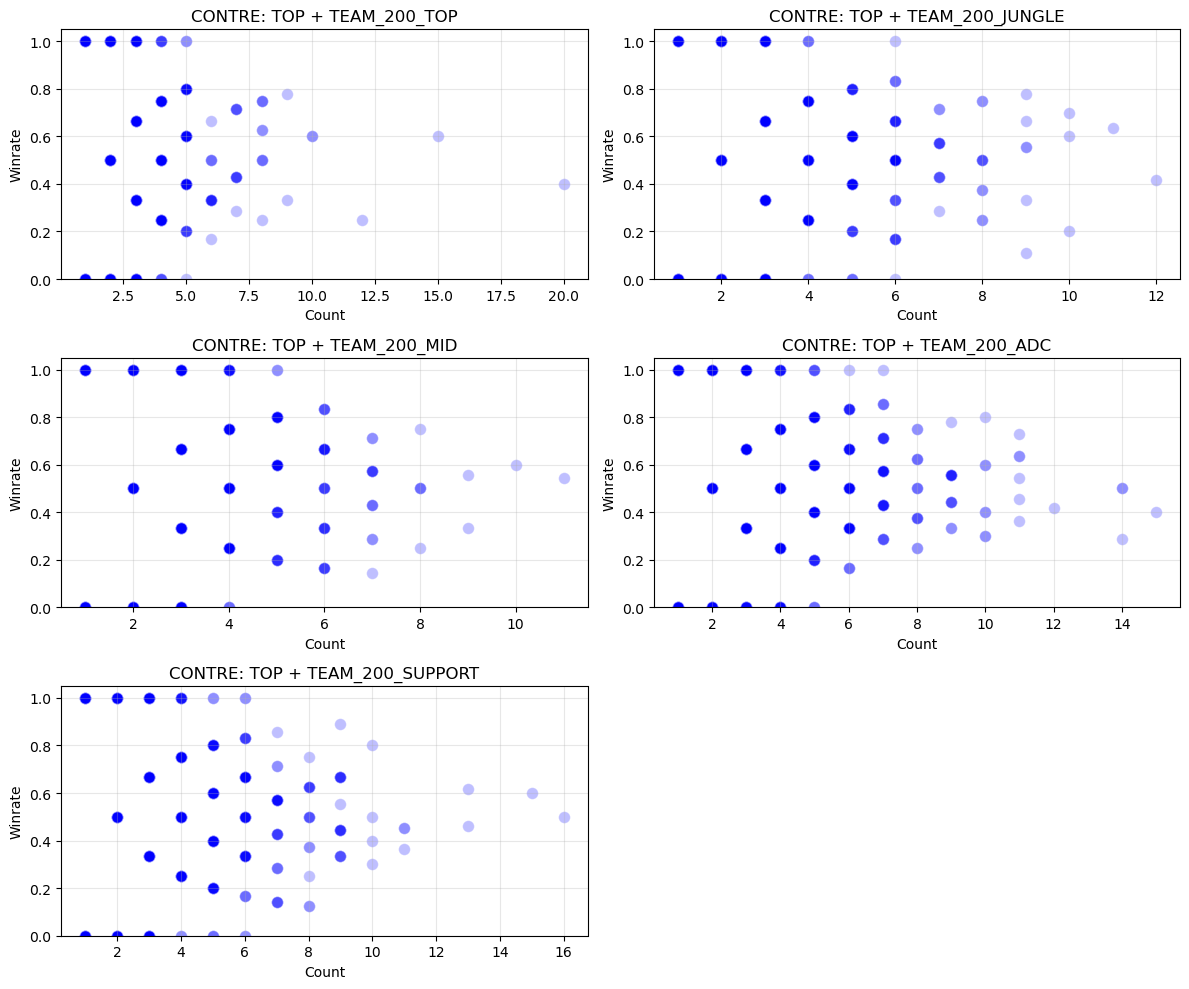

In [638]:
# 1. Colonnes champion_name de team 100
vars_to_check = [col for col in df.columns if "champion_name" in col and "200" in col]

# 2. Conserver uniquement TOP + autres rôles
top_var = "team_100_top_champion_name"
other_vars = [col for col in vars_to_check if col != top_var]

# 3. Calcul pour chaque rôle
plots = {}

for var in other_vars:
    temp = (
        df.groupby([top_var, var])[target]
        .agg(
            winrate="mean",
            count="size"
        )
        .reset_index()
    )
    plots[var] = temp

# 4. Création des graphes (un par rôle)
cols = 2
rows = (len(plots) + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(12, 10))
axes = axes.flatten()

for ax, (role, data) in zip(axes, plots.items()):
    
    sns.scatterplot(
        data=data,
        x="count",
        y="winrate",
        color="blue",
        s=70,
        alpha=0.25,
        ax=ax
    )
    
    ax.set_title(f"CONTRE: TOP + {role.replace('team_100_', '').replace('_champion_name','').upper()}")
    ax.set_xlabel("Count")
    ax.set_ylabel("Winrate")
    ax.set_ylim(0, 1.05)
    ax.grid(alpha=0.3)

# Masquer cases vides
for i in range(len(plots), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


##### Variables quantitatives

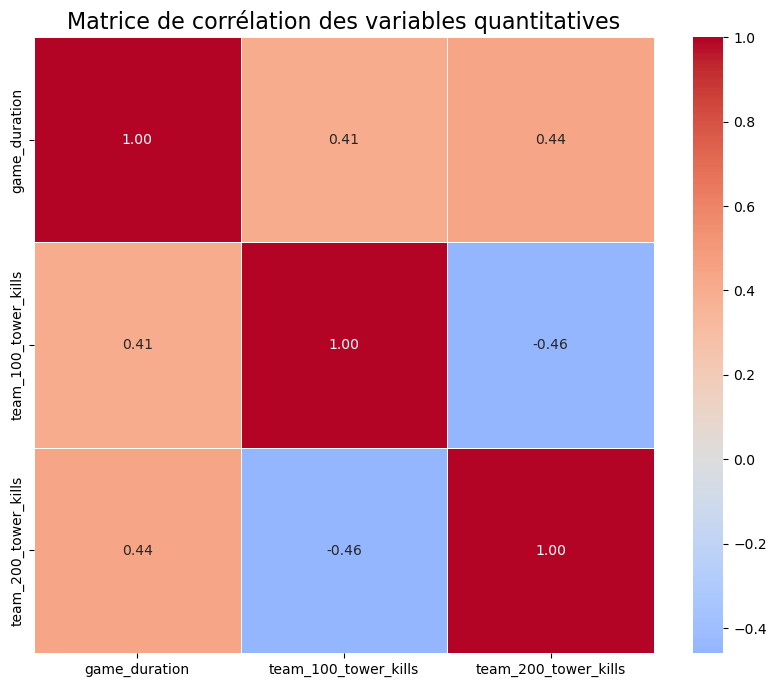

In [640]:
# Sélection des variables quantitatives
quant_vars = df.select_dtypes(include=np.number)

# Calcul de la matrice de corrélation
corr_matrix = quant_vars.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,           # Affiche les coefficients
    fmt=".2f",            # Format à 2 décimales
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Matrice de corrélation des variables quantitatives", fontsize=16)
plt.show()


In [641]:
# --- 1. Sélection des variables quantitatives ---
quant_vars = df.select_dtypes(include=np.number)

# --- 2. Extraire les paires corrélées > seuil (sans doublons) ---
pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)): 
        if abs(corr_matrix.iloc[i, j]) > 0:
            pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Convertir en DataFrame
corr_pairs = pd.DataFrame(pairs, columns=["var1", "var2", "correlation"])
corr_pairs

,var1,var2,correlation
0,game_duration,team_100_tower_kills,0.406777
1,game_duration,team_200_tower_kills,0.443704
2,team_100_tower_kills,team_200_tower_kills,-0.459748


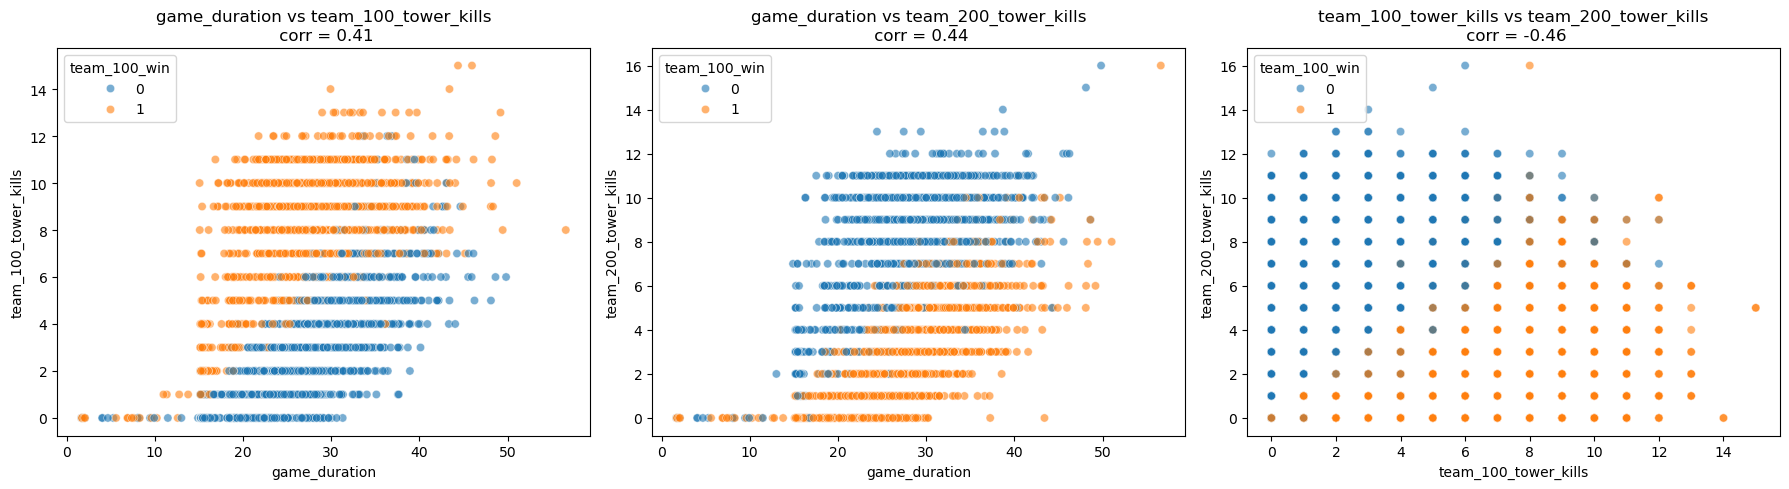

In [642]:
target = "team_100_win"
pairs_to_plot = corr_pairs.reset_index(drop=True)
n = len(pairs_to_plot)

if n == 0:
    print("⚠️ Aucun couple de variables à afficher !")
else:
    cols = 3
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(18, rows*5))
    axes = axes.flatten()

    for idx, row in pairs_to_plot.iterrows():
        v1, v2, c = row["var1"], row["var2"], row["correlation"]
        ax = axes[idx]

        sns.scatterplot(
            data=df,
            x=v1,
            y=v2,
            hue=target,
            alpha=0.6,
            legend=True,
            ax=ax
        )

        # Déplacer la légende en haut à gauche
        ax.legend(loc='upper left', title=target)
        
        ax.set_title(f"{v1} vs {v2}\n corr = {c:.2f}")
        ax.set_xlabel(f"{v1}")
        ax.set_ylabel(f"{v2}")

    # masquer les axes restants
    for j in range(n, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()


In [643]:
# Vérifie les doublons exacts de lignes dans le DataFrame
nb_doublons = df.duplicated().sum()
print(f"Nombre de doublons dans le DataFrame : {nb_doublons}")

Nombre de doublons dans le DataFrame : 0


In [644]:
# Affiche les lignes dupliquées
doublons = df[df.duplicated(keep=False)]  # keep=False pour montrer toutes les occurrences
doublons

,region,source_elo,game_duration,game_version,team_100_win,team_100_top_champion_name,team_100_jungle_champion_name,team_100_mid_champion_name,team_100_adc_champion_name,team_100_support_champion_name,team_100_ban_1_champion_id,team_100_ban_2_champion_id,team_100_ban_3_champion_id,team_100_ban_4_champion_id,team_100_ban_5_champion_id,team_100_top_summoner_1_name,team_100_top_summoner_2_name,team_200_ban_1_champion_id,team_200_ban_2_champion_id,team_200_ban_3_champion_id,team_200_ban_4_champion_id,team_200_ban_5_champion_id,team_200_top_champion_name,team_200_jungle_champion_name,team_200_mid_champion_name,team_200_adc_champion_name,team_200_support_champion_name,team_200_top_summoner_1_name,team_200_top_summoner_2_name,team_100_first_tower,team_100_tower_kills,team_200_first_tower,team_200_tower_kills


In [645]:
# Supprime les doublons et réinitialise l'index
df = df.drop_duplicates().reset_index(drop=True)
print("Doublons supprimés. Nouvelle dimension du DataFrame :", df.shape)

Doublons supprimés. Nouvelle dimension du DataFrame : (3501, 33)


In [646]:
df.to_csv("lol_matches_export_clean1.csv", index=False)